# Validation Shape Bias

In [2]:
import matplotlib.pyplot as plt
import seaborn

import util.util_validation as ut_val

seaborn.set_style("darkgrid")

## Texture conflict animals10 many

### CE_origAllAug, SupCon_diffNoAug, SupConHybrid_colorAug, SupConFactor_dcAssA

In [2]:
cuda_device = 0

models_dict = {"CE_origAllAug": ["./save/SupCE/animals10_diff_-1/SupCE_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_origAllAug_cosine/models/last.pth", None],
               "SupCon_diffNoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", ""],
               "SupConHybrid_colorAug": ["./save/SupCon/animals10_diff_-1+4000/SupConHybrid_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAug_cosine/models/last.pth", ""],
               "SupConFactor_dcAssA": ["./save/SupCon/animals10_diff_-1+4000/SupCon_5.0_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_factor5cAugSameSAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_many/"

pred_dict, classes, _ = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)

Get predictions for shape texture cue conflict dataset


100%|██████████| 897/897 [04:24<00:00,  3.40it/s]


,CE_origAllAug,SupCon_diffNoAug,SupConHybrid_colorAug,SupConFactor_dcAssA
shape_bias,0.628997,0.624380,0.586778,0.675375
acc,0.414543,0.216088,0.256328,0.374389
acc_shape,0.260746,0.134921,0.150408,0.252853
acc_texture,0.153797,0.081167,0.105920,0.121536
shape_bias_b,0.628997,0.624380,0.586778,0.675375
acc_b,0.414543,0.216088,0.256328,0.374389
acc_b_shape,0.260746,0.134921,0.150408,0.252853
acc_b_texture,0.153797,0.081167,0.105920,0.121536


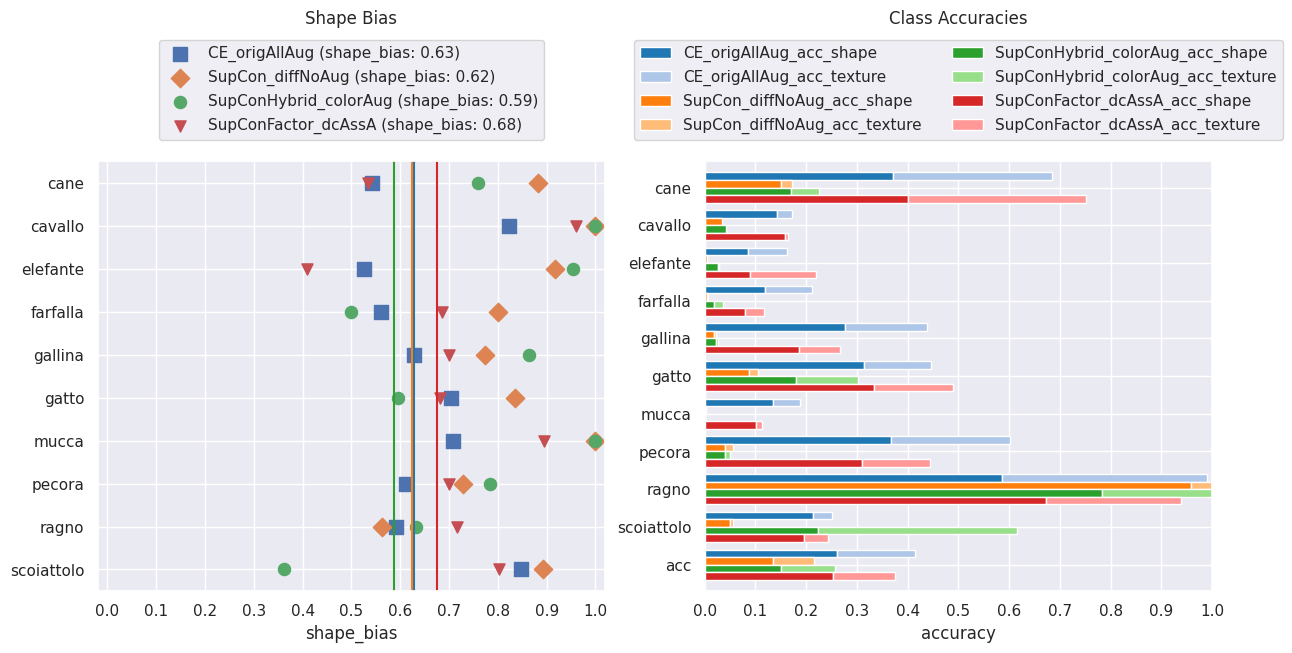

In [3]:
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, df_bias, ax=axs[1])

df_bias

### All decent classifiers

Based on these classifiers where the shape images for "shape_texture_conflict_animals10_many" selected.
Meaning all shape images where correctly classified by these five models.

In [4]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", None],
               "CE_diffAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "CE_diffAugAllAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAugAllAug_cosine/models/last.pth", None],
               "SupCon_baseline": ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", ""],
               "SupCon_diffCSameSAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAugSameShapeAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_many/"

pred_dict, classes, _ = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)

Get predictions for shape texture cue conflict dataset


100%|██████████| 897/897 [04:24<00:00,  3.40it/s]


,CE_baseline,CE_diffAug,CE_diffAugAllAug,SupCon_baseline,SupCon_diffCSameSAug
shape_bias,0.531389,0.498145,0.631831,0.623623,0.668610
acc,0.395667,0.393136,0.420764,0.416602,0.390047
acc_shape,0.210253,0.195839,0.265852,0.259803,0.260789
acc_texture,0.185414,0.197297,0.154912,0.156800,0.129258
shape_bias_b,0.531389,0.498145,0.631831,0.623623,0.668610
acc_b,0.395667,0.393136,0.420764,0.416602,0.390047
acc_b_shape,0.210253,0.195839,0.265852,0.259803,0.260789
acc_b_texture,0.185414,0.197297,0.154912,0.156800,0.129258


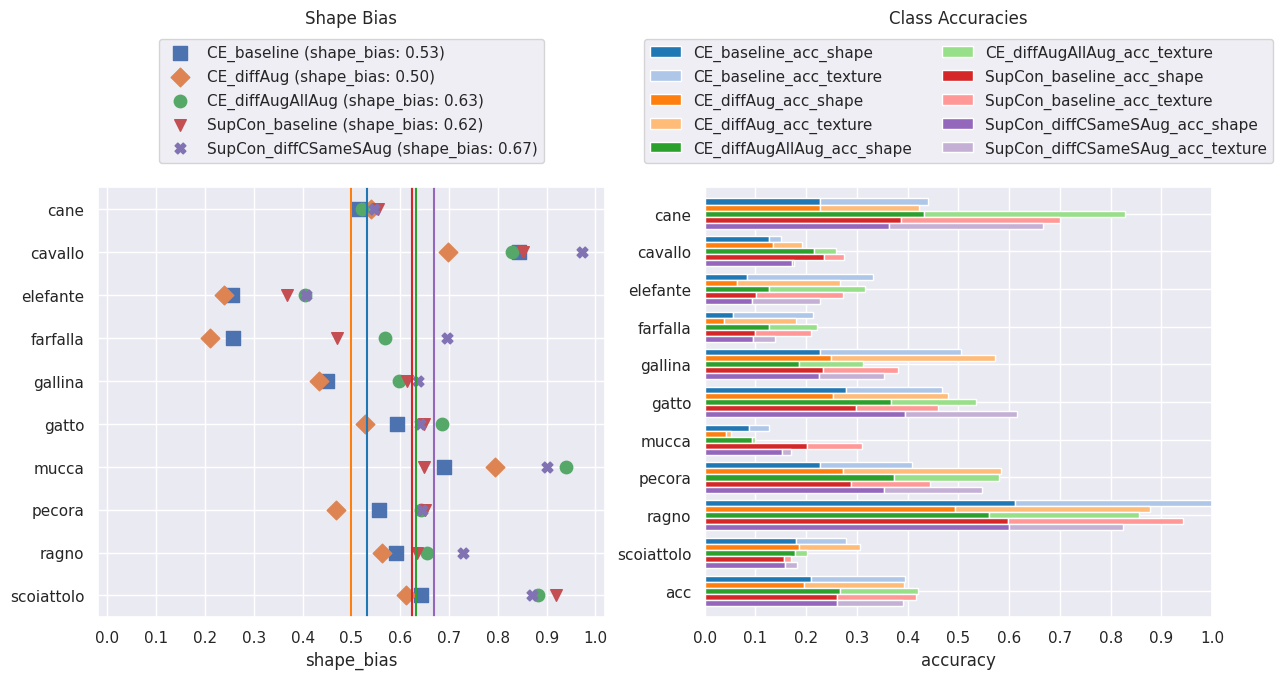

In [5]:
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, df_bias, ax=axs[1])

df_bias

## Texture conflict animals10 two

### All good classifiers

In [6]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", None],
               "CE_diffAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "CE_diffAugAllAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAugAllAug_cosine/models/last.pth", None],
               "SupCon_baseline": ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", ""],
               "SupCon_diffCSameSAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAugSameShapeAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_two/"

pred_dict, classes, exclude_original_dict = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device, exclude_miss_classified=True)

Get the union over all miss classified images


100%|██████████| 202/202 [00:59<00:00,  3.38it/s]


Get predictions for shape texture cue conflict dataset


100%|██████████| 180/180 [00:53<00:00,  3.36it/s]


      cane: 869/1103 (0.79)
   cavallo: 487/546 (0.89)
  elefante: 259/332 (0.78)
  farfalla: 372/482 (0.77)
   gallina: 562/689 (0.82)
     gatto: 285/422 (0.68)
     mucca: 304/469 (0.65)
    pecora: 298/484 (0.62)
     ragno: 914/1030 (0.89)
scoiattolo: 325/432 (0.75)


,CE_baseline,CE_diffAug,CE_diffAugAllAug,SupCon_baseline,SupCon_diffCSameSAug
shape_bias,0.472931,0.504981,0.654096,0.617318,0.666520
acc,0.553155,0.493904,0.527487,0.536043,0.487487
acc_shape,0.261604,0.249412,0.345027,0.330909,0.324920
acc_texture,0.291551,0.244492,0.182460,0.205134,0.162567
shape_bias_b,0.437526,0.475521,0.624336,0.581417,0.638151
acc_b,0.517752,0.466113,0.489562,0.491646,0.448088
acc_b_shape,0.226530,0.221647,0.305651,0.285851,0.285948
acc_b_texture,0.291222,0.244466,0.183911,0.205795,0.162140


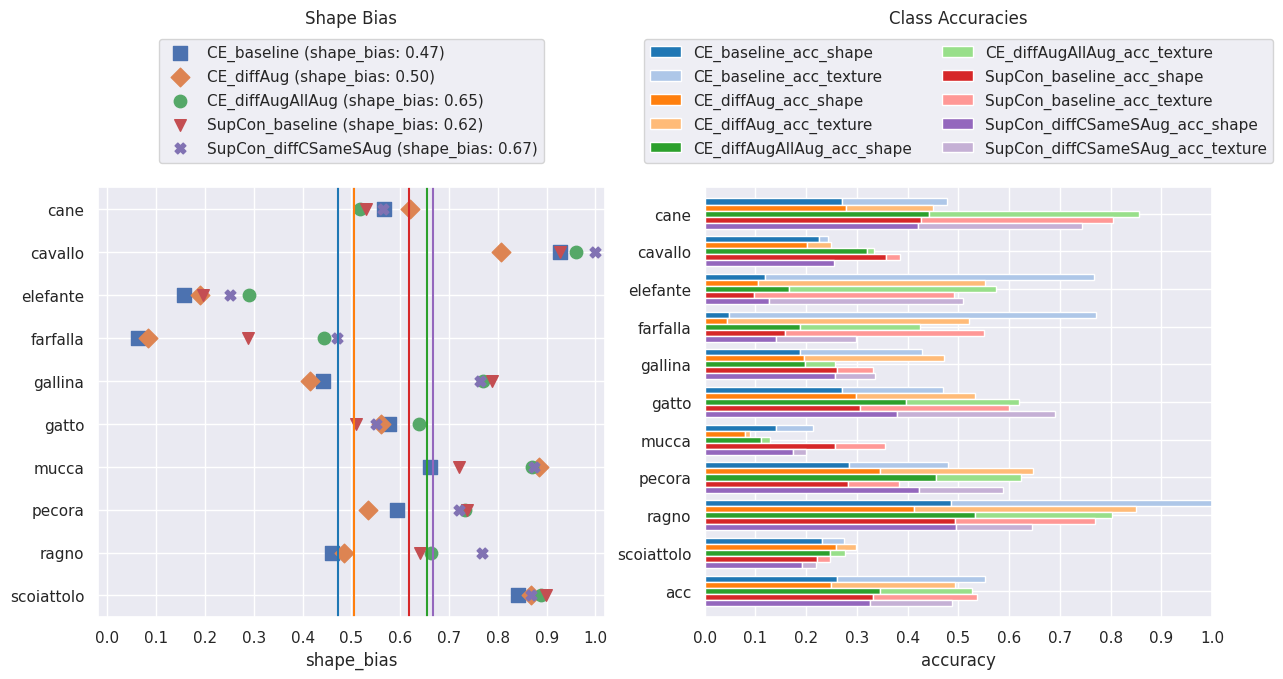

In [7]:
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, df_bias, ax=axs[1])

c_lens = pred_dict["CE_baseline"][["shape_class", "pred_class"]].groupby("shape_class").count().values.reshape(-1)
for l,c in enumerate(exclude_original_dict):
    excl_len = len(exclude_original_dict[c])
    c_len = c_lens[l] + excl_len
    print(f"{c:>10}: {c_lens[l]:>3}/{c_len:>3} ({c_lens[l]/c_len:.2f})")

df_bias

### All interesting decent classifiers

In [3]:
cuda_device = 0

models_dict = {"CE_baseline": ["./save/SupCE/animals10/SupCE_animals10_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_baseline_cosine/models/ckpt_epoch_500.pth", None],
               "CE_diff4000": ["./save/SupCE/animals10_diff_4000/SupCE_animals10_diff_4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_4000_cosine/models/last.pth", None],
               "CE_diff8000": ["./save/SupCE/animals10_diff_8000/SupCE_animals10_diff_8000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_8000_cosine/models/last.pth", None],
               "CE_diff4000Aug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAug_cosine/models/last.pth", None],
               "CE_diff4000AugAllAug": ["./save/SupCE/animals10_diff_-1+4000/SupCE_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_trial_0_diffAugAllAug_cosine/models/last.pth", None],
               "SupCon_baseline": ["./save/SupCon/animals10_diff_-1/SupCon_animals10_diff_-1_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_try3_cosine/models/last.pth", ""],
               "SupCon_diff4000NoAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_noAug_cosine/models/last.pth", ""],
               "SupCon_diff4000cSameSAug": ["./save/SupCon/animals10_diff_-1+4000/SupCon_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAugSameShapeAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_two/"

pred_dict, classes, exclude_original_dict = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device, exclude_miss_classified=True)

Get the union over all miss classified images


100%|██████████| 202/202 [00:59<00:00,  3.39it/s]


Get predictions for shape texture cue conflict dataset


100%|██████████| 97/97 [00:29<00:00,  3.34it/s]


      cane: 534/1440 (0.37)
   cavallo: 249/697 (0.36)
  elefante:  43/527 (0.08)
  farfalla: 326/545 (0.60)
   gallina: 442/818 (0.54)
     gatto:  60/685 (0.09)
     mucca: 171/684 (0.25)
    pecora: 111/754 (0.15)
     ragno: 419/1281 (0.33)
scoiattolo: 165/607 (0.27)


,CE_baseline,CE_diff4000,CE_diff8000,CE_diff4000Aug,CE_diff4000AugAllAug,SupCon_baseline,SupCon_diff4000NoAug,SupCon_diff4000cSameSAug
shape_bias,0.478986,0.697436,0.557377,0.516990,0.666420,0.636957,0.742015,0.694136
acc,0.547619,0.309524,0.338889,0.490476,0.536508,0.547619,0.323016,0.500794
acc_shape,0.262302,0.215873,0.188889,0.253571,0.357540,0.348810,0.239683,0.347619
acc_texture,0.285317,0.093651,0.150000,0.236905,0.178968,0.198810,0.083333,0.153175
shape_bias_b,0.455476,0.620212,0.496297,0.505337,0.651687,0.603923,0.649293,0.685858
acc_b,0.523130,0.257831,0.302192,0.477103,0.518011,0.507320,0.262985,0.482571
acc_b_shape,0.238273,0.159910,0.149977,0.241098,0.337581,0.306383,0.170754,0.330975
acc_b_texture,0.284857,0.097921,0.152215,0.236005,0.180430,0.200938,0.092231,0.151596


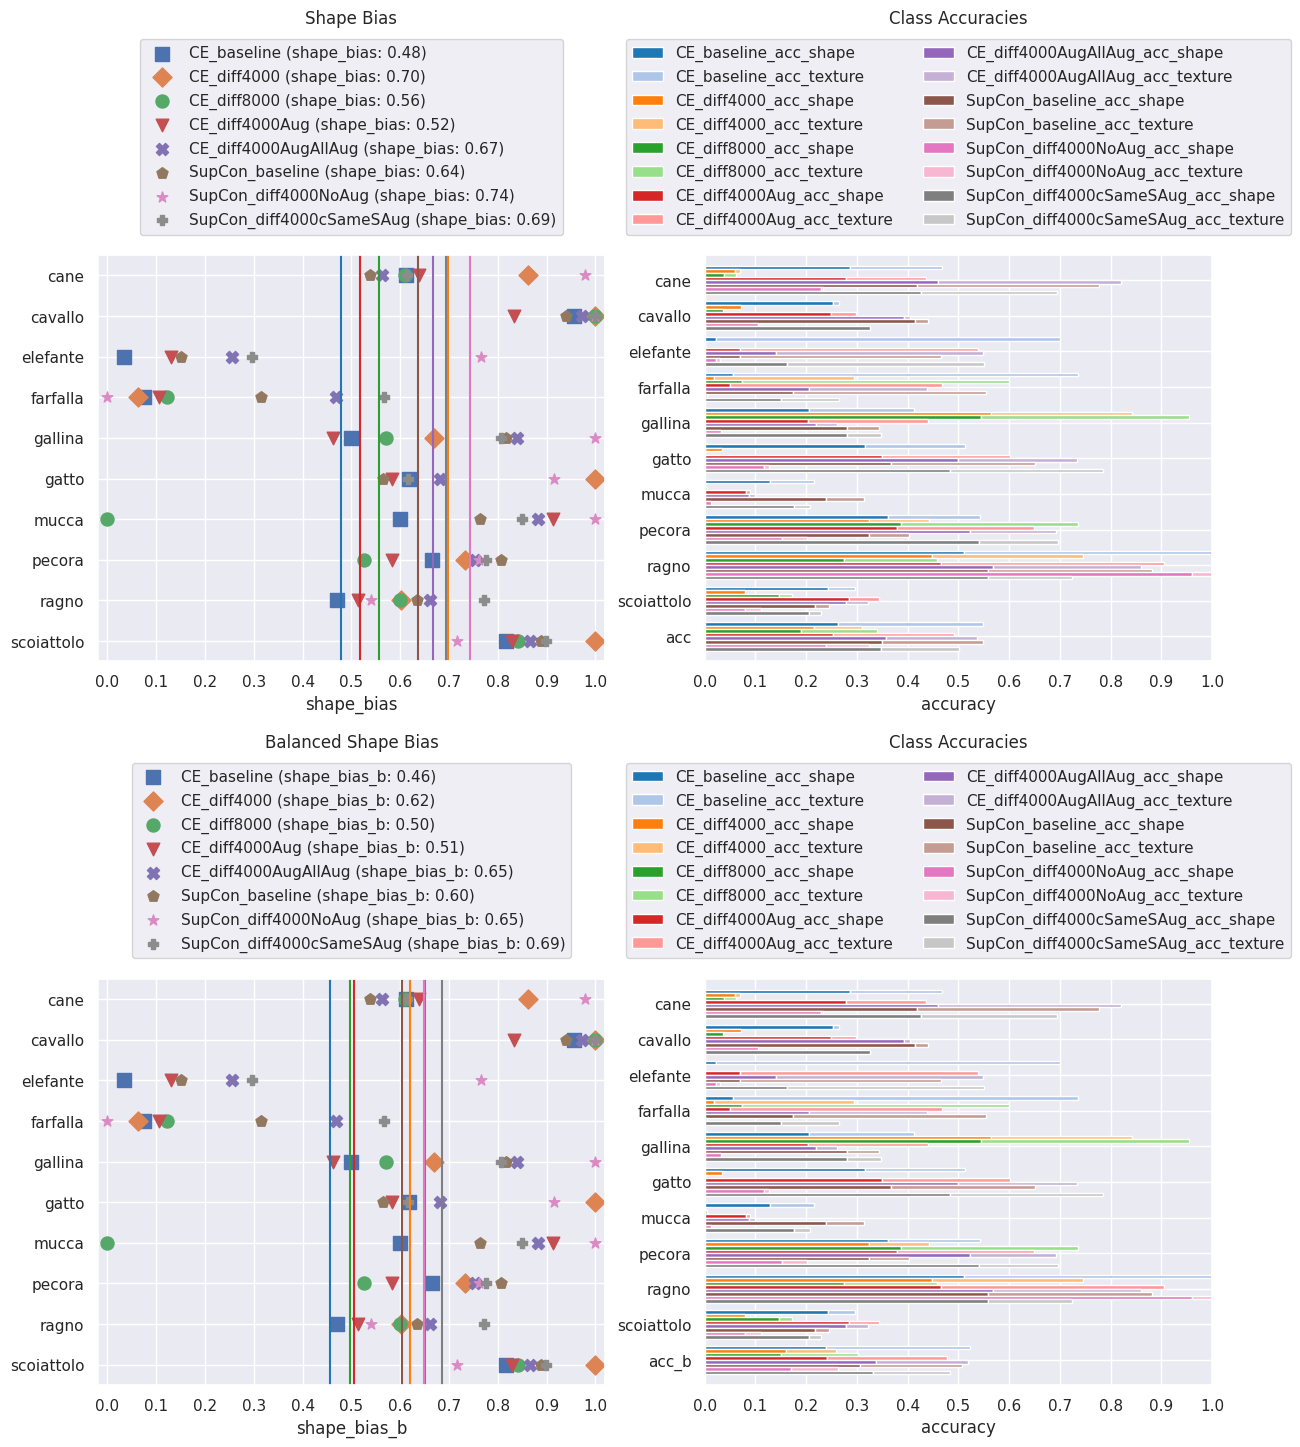

In [4]:
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.tight_layout(h_pad=17, w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0,0])
ut_val.plot_class_accuracies_stacked(class_biasses, df_bias, ax=axs[0,1])

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[1,0], balanced=True)
ut_val.plot_class_accuracies_stacked(class_biasses, df_bias, ax=axs[1,1], balanced=True)

c_lens = pred_dict["CE_baseline"][["shape_class", "pred_class"]].groupby("shape_class").count().values.reshape(-1)
for l,c in enumerate(exclude_original_dict):
    excl_len = len(exclude_original_dict[c])
    c_len = c_lens[l] + excl_len
    print(f"{c:>10}: {c_lens[l]:>3}/{c_len:>3} ({c_lens[l]/c_len:.2f})")

df_bias

### SupConHybrid with color augmentation

In [8]:
cuda_device = 0

models_dict = {"SupConHybrid_colorAug": ["./save/SupCon/animals10_diff_-1+4000/SupConHybrid_animals10_diff_-1+4000_resnet18_lr_0.125_decay_0.0001_bsz_26_temp_0.1_trial_0_colorAug_cosine/models/last.pth", ""]}

dataset_stConflict = "./datasets/adaIN/shape_texture_conflict_animals10_two/"

pred_dict, classes, exclude_original_dict = ut_val.evaluate_shape_texture_conflict(models_dict=models_dict, dataset_stConflict=dataset_stConflict, cuda_device=cuda_device)

Get predictions for shape texture cue conflict dataset


100%|██████████| 202/202 [00:59<00:00,  3.40it/s]


,SupConHybrid_colorAug
acc,0.303476
acc_b,0.243770
acc_b_shape,0.151596
acc_b_texture,0.092174
acc_shape,0.213140
acc_texture,0.090336
shape_bias,0.702329
shape_bias_b,0.621883


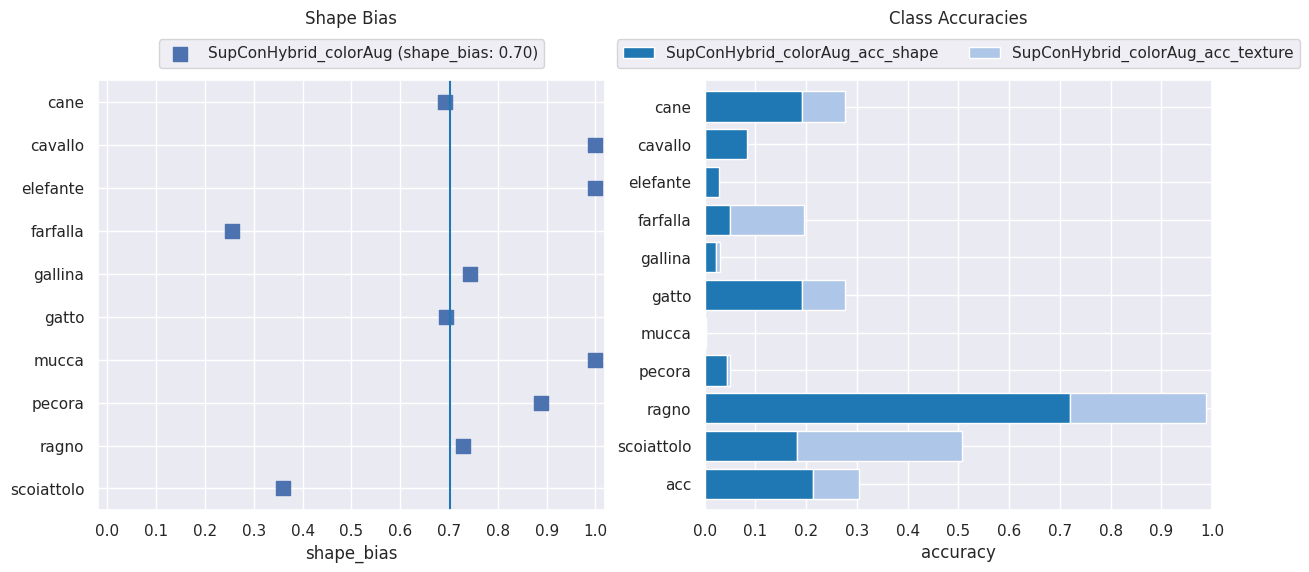

In [9]:
df_bias, class_biasses = ut_val.compute_shape_biases(pred_dict, classes)

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
fig.tight_layout(w_pad=3)

ut_val.plot_shape_texture_conflict_bias(class_biasses, df_bias, ax=axs[0])
ut_val.plot_class_accuracies_stacked(class_biasses, df_bias, ax=axs[1])

df_bias